In [7]:
# Daten einlesen

%matplotlib inline
import pymssql
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib
import datetime
import time


conn = pymssql.connect("pcs.f4.htw-berlin.de",
                       "Masterprojekt", "Masterprojekt", "PraediktiveAnalysenTest")
cursor = conn.cursor()
# df = pd.read_sql('SELECT * FROM Maschinendaten_20181206', conn)
df = pd.read_sql('SELECT TOP 1000 * FROM Maschinendaten_20181206 ORDER BY ID DESC', conn)
conn.close()

# umgekehrt sortieren
df = df.sort_values("ID")
new_index = []
for x in range(1, (len(df)+1), 1):
    new_index.append(x)
df["new_index"] = new_index
#df.dtypes
# pd.Index(df["Timestamp"])
#print(len(df))
# print(df.head())


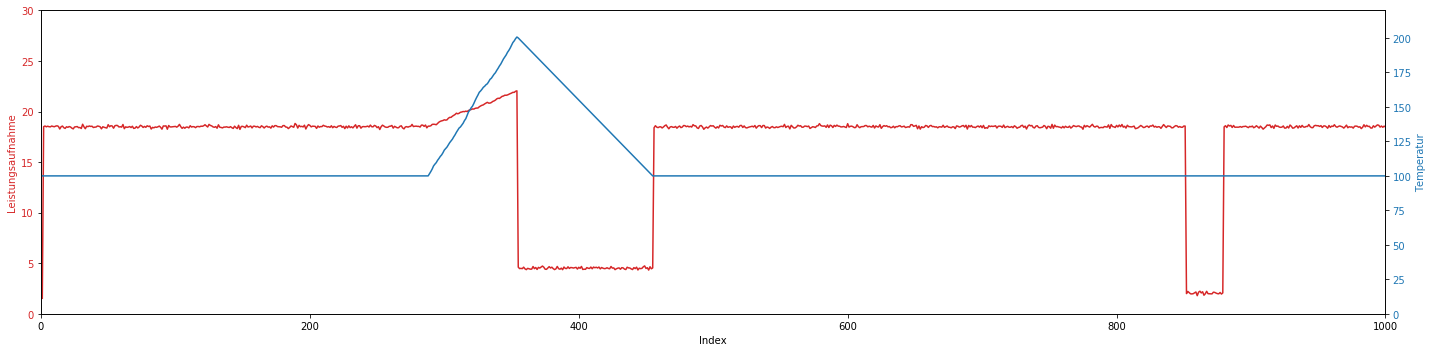

In [8]:
# Create some mock data
i = df["new_index"]
data1 = df['Leistungsaufnahme']
data2 = df['Temperatur']

fig, ax1 = plt.subplots(figsize=(20,5))

color = 'tab:red'
ax1.set_xlabel('Index')
ax1.set_ylabel('Leistungsaufnahme', color=color)
ax1.plot(i, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.plot(10, ':g')
plt.ylim(0,30)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperatur', color=color)  # we already handled the x-label with ax1
ax2.plot(i, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.ylim(0,220)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.xlim(0,len(df))
plt.show()